
#Climbing The Steps of The Empire State Building Steps: The Game
The objective is to create a Dice game logic, which will decide the odds of reaching Step number 60 of the Empire State Building in 100 rolls of the die. We would then simulate this sequence multiple times to calculate the probability of reaching step 60 in 100 tries using the Dice game logic.


#Rules
For each random walk sequence we throw a Die.
1. Step 0 at ground level, is the starting point.
2. If the roll of the Die returns 1 or 2, climb down one step.
3. If the roll of the Die returns 3, 4 or 5, go up one step.
4. If the roll of the Die returns 6, throw the Die again and advance the number of steps equal to that throw.
5. There is a little chance of being clumsy and falling down the Stairs in which case we start again from 0.
6. The value of Steps cannot be negative, the lowest value would always be 0 (which is the starting point).

#Some pointers that might help with the code:

1. The function random.seed() may be used to make your results reproducible.
2. To represent clumsiness of falling down, generate a random number between 0 and 1. If that number is less than .001, set the steps value to Zero as is the rule.
3. You'll want to run the Dice game many times to calculate the probability of reaching step 60 in 100 rolls.




# Your Tasks
1. Write code for the above Dice game.
2. Estimate the probability of reaching step 60 in 100 rolls.
3. Create a plot of your random walk results.

# Solution


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_simulations = 100
successes = 0
all_steps = []


# Run the simulation for the specified number of times
for _ in range(num_simulations):
    steps = 0  # Initialize steps to 0 for each simulation

    # Perform 100 dice rolls for each simulation
    for _ in range(100):
        # Check for clumsiness (1 in 1000 chance)
        if random.random() < 0.001:
            steps = 0  # Reset to ground level if clumsy
            continue  # Skip to next roll
        
        # Roll a six-sided die
        roll = random.randint(1, 6)
        
        # Apply game rules based on the roll
        if roll in [1, 2]:
            steps = max(0, steps - 1)  # Move down one step, but not below 0
        elif roll in [3, 4, 5]:
            steps += 1  # Move up one step
        else:  # roll == 6
            bonus_roll = random.randint(1, 6)
            steps += bonus_roll  # Move up by the bonus roll amount
        
        # Check if we've reached or passed step 60
        if steps >= 60:
            successes += 1  # Count as a success
            break  # End this simulation early
    
    # Store the final step reached in this simulation
    all_steps.append(steps)
    
    probability = successes / num_simulations
print(f"\nProbability of reaching step 60: {probability:.2%}")

steps_array = np.array(all_steps)
steps_array.mean()


Probability of reaching step 60: 90.00%


np.float64(59.05)

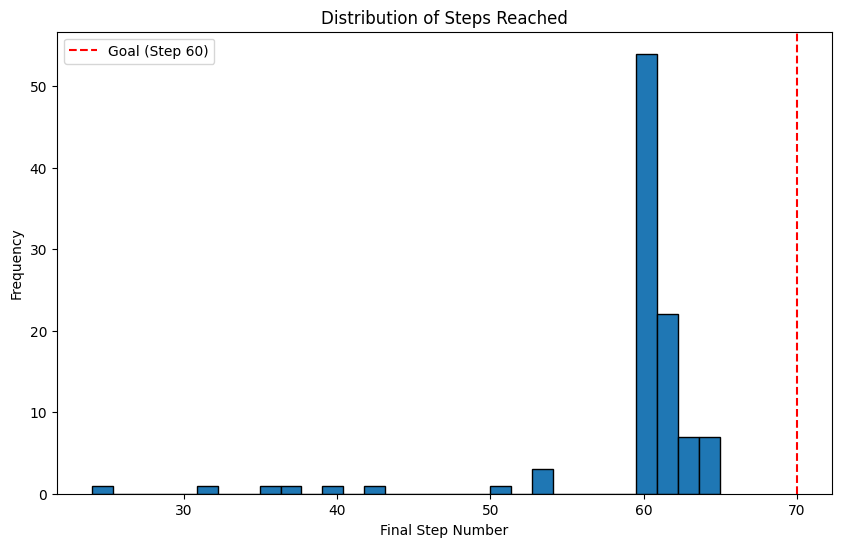

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(all_steps, bins=30, edgecolor='black')
plt.title('Distribution of Steps Reached')
plt.xlabel('Final Step Number')
plt.ylabel('Frequency' )
plt.axvline(x=70, color='r', linestyle='--', label='Goal (Step 60)')
plt.legend()
plt.show()
